In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

%matplotlib inline

In [2]:
df = pd.read_excel("Contracts.xlsx")

In [3]:
df.head()

,Item #,PO,Dept,Description,Professional / Consulting Services,Follow-on / Amendment,Amount,Vendor,Non-Competitive Rationale,Type,Year,Quarters
0,1,45082129,AG,Professional audit services for the Light Rail...,PE,NaN,50909.51,JENKINS RTS LLC\nSAN MARTIN CA,Section 22(1)(d)\nAbsence of competition for t...,FEDCO,2016,12
1,2,45082183,AG,Professional auditing services for the LRT Pla...,PE,NaN,59682.24,SAMSON & ASSOCIES CPA CONSULTATION\nGATINEAU QC,NaN,FEDCO,2016,12
2,3,45082677,AG,To provide professional auditing services for ...,PE,NaN,34630.20,PRICE WATERHOUSE COOPER LLP\nOTTAWA ON,NaN,FEDCO,2016,12
3,4,45064327,CCS,To provide off-site records storage and record...,NaN,A,610560.00,IRON MOUNTAIN CANADA OPERATION ULC\nTORONTO ON,NaN,FEDCO,2016,12
4,5,45069664,CCS,Supply of parking tickets for the handheld tic...,NaN,A,30157.09,PARKSMART INC\nMISSISSAUGA ON,NaN,FEDCO,2016,12


In [4]:
#quick facts - number of contracts, total value
df.count()

Item #                                4455
PO                                    4449
Dept                                  4455
Description                           4455
Professional / Consulting Services    1509
Follow-on / Amendment                 1731
Amount                                4455
Vendor                                4455
Non-Competitive Rationale              606
Type                                  4454
Year                                  4455
Quarters                              4455
dtype: int64

In [5]:
df['Amount'].sum()

1895219962.1800001

In [6]:
#largest contracts
pd.options.display.max_colwidth = 264
df_sort = df.sort_values('Amount', ascending=False)
display(df_sort.iloc[0:5, 3])
display(df_sort.iloc[0:5, 6])

1541                                                                                            Combined sewage storage tunnel construction.
4120                                   To provide wheelchair accessible and non-accessible taxi services for Transit Services' Para Transpo.
4454                                                     Standing Offer for the supply and delivery of genuine Cummins parts and components.
3608    To provide all labour, equipment and materials for Robert O Pickard Environmental Centre thickening and dewatering building upgrade.
4416                      Supply and deliver Bulk Clear Diesel Fuel ULSD# 2 to Transit Services for the period 01 May 2017 to 30 April 2020.
Name: Description, dtype: object

1541    1.613505e+08
4120    4.997179e+07
4454    2.734941e+07
3608    1.943757e+07
4416    1.926069e+07
Name: Amount, dtype: float64

In [7]:
df_sort.head()

,Item #,PO,Dept,Description,Professional / Consulting Services,Follow-on / Amendment,Amount,Vendor,Non-Competitive Rationale,Type,Year,Quarters
1541,350,45083182,"Planning, Infrastructure\n& Economic Development",Combined sewage storage tunnel construction.,NaN,NaN,1.613505e+08,DRAGADOS - TOMLINSON JOINT VENTURE\nTORONTO ON,NaN,FEDCO,2016,34
4120,49,45081953,TO,To provide wheelchair accessible and non-accessible taxi services for Transit Services' Para Transpo.,NaN,NaN,4.997179e+07,PARA LOGISTICS LTD\nOTTAWA ON,Section 22(1)(d)\nAbsence of competition for technical or other reasons,TRANSIT,2016,12
4454,79,STANDING OFFER,Transit Operations,Standing Offer for the supply and delivery of genuine Cummins parts and components.,NaN,NaN,2.734941e+07,CITY VIEW BUS SALES & SERVICE LTD,NaN,TRANSIT,2017,34
3608,469,45085320,"Planning, Infrastructure & Economic Development","To provide all labour, equipment and materials for Robert O Pickard Environmental Centre thickening and dewatering building upgrade.",NaN,NaN,1.943757e+07,PEAK ENGINEERING AND,NaN,FEDCO,2017,34
4416,41,45084429,Transit Operations,Supply and deliver Bulk Clear Diesel Fuel ULSD# 2 to Transit Services for the period 01 May 2017 to 30 April 2020.,NaN,E,1.926069e+07,SUNCOR/PETRO CANADA,NaN,TRANSIT,2017,34


In [8]:
#let's visualize this

#create new variable concatenate year and quarter
df['YrQtr'] = df.Year.astype(str) + df.Quarters.astype(str)
#shrink the size of the amounts variable
df['Amount_rnd'] = df['Amount'] / 1000


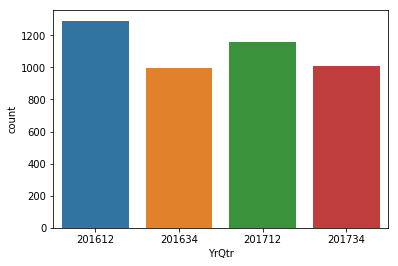

In [9]:
#first, let's see contracts per year
sns.countplot(x='YrQtr',data=df)

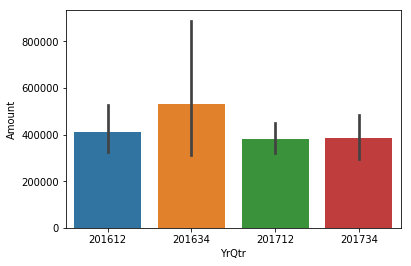

In [10]:
sns.barplot(x="YrQtr", y="Amount", data=df);

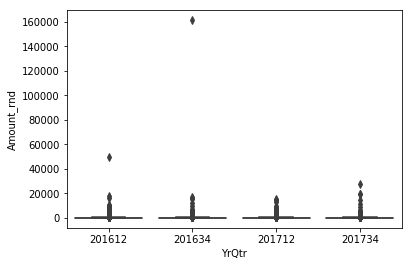

In [11]:
#interesting - 2016 q 3/4 had less  contracts, but they were worth more than the other groups

#let's do this one by amounts now
sns.boxplot(x="YrQtr", y="Amount_rnd", data=df);

In [12]:
#count by dept
df.Dept.unique()

array(['AG', 'CCS', 'CPBS', 'ED', 'F', 'LRPI', 'CSS', 'EPS', 'ES', 'HR',
       'ITS', 'PRCS', 'PW', 'SO', 'CPO', 'DCM', 'IS', 'PGM', 'REPDO',
       'City Clerk & Solicitor', 'Community and Social\nServices',
       'Corporate Services', 'Emergency Protective Services',
       'Office of the Auditor General',
       'Planning,  Infrastructure\n& Economic Development',
       'Public Works & Environmental  Services',
       'Recreation, Culture & Facility Services',
       'Service Innovation & Performance', 'Transportation  Services',
       'Committee of Adjustment', 'Community and Social Services',
       'Crime Prevention Office',
       'Planning, Infrastructure & Economic Development',
       'Public Works & Environmental Services', 'Transportation Services',
       'CSP', 'SCTD', 'TO', 'TSS',
       'Safety, Compliance, Training & Development',
       'Special Advisor to GM', 'Transit Customer Systems & Planning',
       'Transit Operations', 'Business Support'], dtype=object)

In [13]:
#rename dept values to their acronyms (make up if cant determine)
df['Dept_Old'] = df.Dept
df.Dept.replace(['Community and Social Services', 'Community and Social\nServices'], ["CSS", "CSS"], inplace=True)
df.Dept.replace(['Emergency Protective Services', 'Office of the Auditor General'], ["EPS", "AG"], inplace=True)
df.Dept.replace(['City Clerk & Solicitor', 'Recreation, Culture & Facility Services'], ["CCS", "PRCS"], inplace=True)
df.Dept.replace(['Public Works & Environental Services', 'Crime Prevention Office'], ["PW", "CPO"], inplace=True)
df.Dept.replace(['Safety, Compliance, Training & Development', 'Transit Operations'], ["SCTD", "TO"], inplace=True)
df.Dept.replace(['Transportation Services', 'Infrastructure & Economic Development'], ["TSS", "PIED"], inplace=True)
df.Dept.replace(['Planning, Infrastructure\n&Economic Development', 'Planning,  Infrastructure\n& Economic Development'], ["PIED", "PIED"], inplace=True)
df.Dept.replace(['Corporate Services', 'Public Works & Environmental  Services'], ["CS", "PW"], inplace=True)
df.Dept.replace(['Service Innovation & Performance', 'Transportation  Services'], ["SIP", "TSS"], inplace=True)
df.Dept.replace(['Committee of Adjustment', 'Planning, Infrastructure & Economic Development'], ["CA", "PIED"], inplace=True)
df.Dept.replace(['Public Works & Environmental Services', 'Special Advisor to GM'], ["PW", "SAGM"], inplace=True)
df.Dept.replace(['Transit Customer Systems & Planning', 'Business Support'], ["TCSP", "BS"], inplace=True)

In [14]:
df.Dept.unique()

array(['AG', 'CCS', 'CPBS', 'ED', 'F', 'LRPI', 'CSS', 'EPS', 'ES', 'HR',
       'ITS', 'PRCS', 'PW', 'SO', 'CPO', 'DCM', 'IS', 'PGM', 'REPDO', 'CS',
       'PIED', 'SIP', 'TSS', 'CA', 'CSP', 'SCTD', 'TO', 'SAGM', 'TCSP',
       'BS'], dtype=object)

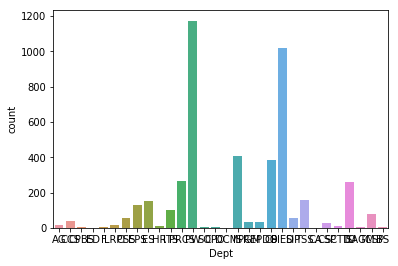

In [15]:
#try the depts now
sns.countplot(x='Dept',data=df)

In [16]:
uni_Dept = df.Dept.unique()

def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]

split_list(uni_Dept, wanted_parts=2)

[array(['AG', 'CCS', 'CPBS', 'ED', 'F', 'LRPI', 'CSS', 'EPS', 'ES', 'HR',
        'ITS', 'PRCS', 'PW', 'SO', 'CPO'], dtype=object),
 array(['DCM', 'IS', 'PGM', 'REPDO', 'CS', 'PIED', 'SIP', 'TSS', 'CA',
        'CSP', 'SCTD', 'TO', 'SAGM', 'TCSP', 'BS'], dtype=object)]

In [17]:
dept1 = uni_Dept[0:15]
dept2 = uni_Dept[15:30]

In [18]:
df1 = df[df['Dept'].isin(dept1)]

In [19]:
df2 = df[df['Dept'].isin(dept2)]

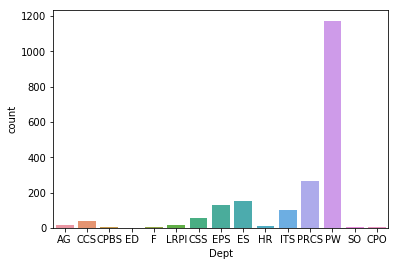

In [20]:
sns.countplot(x='Dept',data=df1)

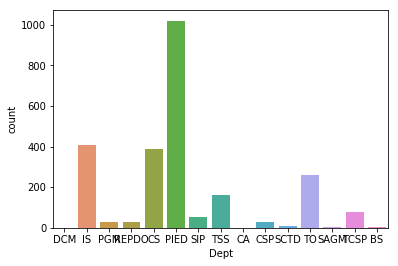

In [21]:
sns.countplot(x='Dept',data=df2)

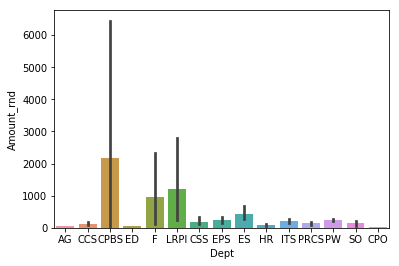

In [22]:
sns.barplot(x="Dept", y="Amount_rnd", data=df1);

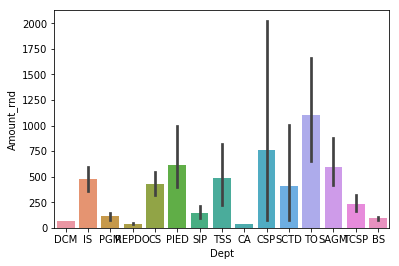

In [23]:
sns.barplot(x="Dept", y="Amount_rnd", data=df2);

In [24]:
#how many were non competitive
ncs = df['Non-Competitive Rationale']

In [25]:
print(ncs.isnull().sum())
print(ncs.notnull().sum())

3849
606


In [26]:
#well, at least the majority are competitive processes! what are the costs between the two?
df['noncomp'] = np.where(df['Non-Competitive Rationale'].isnull(), 1, 0)
pd.value_counts(df['noncomp'].values, sort=False)

0     606
1    3849
dtype: int64

In [27]:
df['Amount'].sum()

1895219962.1800001

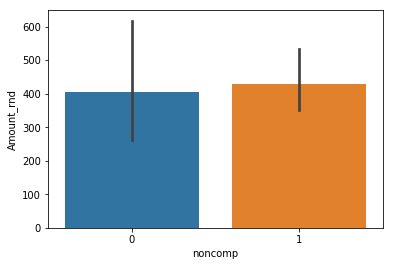

In [28]:
sns.barplot(x="noncomp", y="Amount_rnd", data=df);

In [29]:
#interesting. what kind of values exist in noncompetitive
df['Non-Competitive Rationale'].unique()

array(['Section 22(1)(d)\nAbsence of competition for technical or other reasons',
       nan, 'Section 22(1)(h)\nProfessional Services < $50,000           ',
       'Section 22(1)(c)\nOnly one source of supply acceptable and cost effective',
       'Section 22(1)(a)\nProprietary Rights', 'Section 22(1)(i)\nUtility',
       'Section 22(1)(f)\nSpecial Circumstance',
       'Section 22(1)(7)\nCity Manager Approval',
       'Section 22(1)(a) Proprietary Rights',
       'Section 22(1)(h)\nProfessional Services < $50,000',
       'Section 22(1)(e)\nSecurity or Confidentiality Matters',
       'Section 22(1)(f) Special Circumstance',
       'Section 22(1)(b)\nAbnormal Market Conditions',
       'Section 22(1)(7)City Manager Approval', 'City Manager Approval'], dtype=object)

In [30]:
#okay, seems legit at least. let's assign some numbers to this
df_nc = pd.get_dummies(df,columns=['Non-Competitive Rationale'],drop_first=True)

In [31]:
df_nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 28 columns):
Item #                                                                                                4455 non-null int64
PO                                                                                                    4449 non-null object
Dept                                                                                                  4455 non-null object
Description                                                                                           4455 non-null object
Professional / Consulting Services                                                                    1509 non-null object
Follow-on / Amendment                                                                                 1731 non-null object
Amount                                                                                                4455 non-null float64
Vendor                          

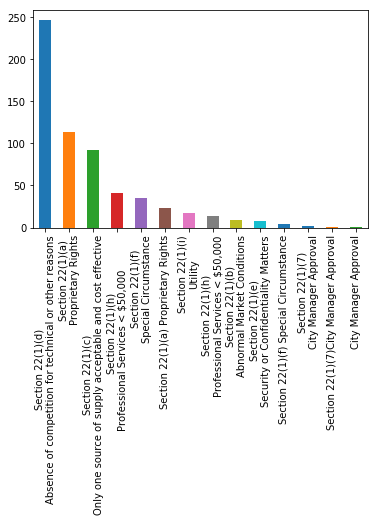

In [32]:
pd.value_counts(df['Non-Competitive Rationale']).plot.bar()

In [34]:
df['ncr'] = df[df.Non-Competitive Rationale.str.contains('City Manager Approval')]
df.head()

SyntaxError: invalid syntax (<ipython-input-34-849352fe5f96>, line 1)

In [35]:
g1 = (df.groupby(by=['Non-Competitive Rationale'], as_index=False)['Amount_rnd'].sum())

In [36]:
g1

,Non-Competitive Rationale,Amount_rnd
0,City Manager Approval,15094.14119
1,Section 22(1)(7)\nCity Manager Approval,22548.16498
2,Section 22(1)(7)City Manager Approval,15838.58682
3,Section 22(1)(a)\nProprietary Rights,23558.63842
4,Section 22(1)(a) Proprietary Rights,2780.67178
5,Section 22(1)(b)\nAbnormal Market Conditions,1480.43340
6,Section 22(1)(c)\nOnly one source of supply acceptable and cost effective,11865.31610
7,Section 22(1)(d)\nAbsence of competition for technical or other reasons,112952.46630
8,Section 22(1)(e)\nSecurity or Confidentiality Matters,18183.26898
9,Section 22(1)(f)\nSpecial Circumstance,13190.74412


In [37]:
df1 = df[df['Non-Competitive Rationale'].notnull()]

In [38]:
#try to combine strings that need to be combined
df1['ncr_class'] = 0
df1['ncr_class'] = np.where(df1['Non-Competitive Rationale'].str.contains("City Manager"),1,df1['ncr_class'])
df1['ncr_class'] = np.where(df1['Non-Competitive Rationale'].str.contains("Proprietary"),2,df1['ncr_class'])
df1['ncr_class'] = np.where(df1['Non-Competitive Rationale'].str.contains("Abnormal"),3,df1['ncr_class'])
df1['ncr_class'] = np.where(df1['Non-Competitive Rationale'].str.contains("Only one source"),4,df1['ncr_class'])
df1['ncr_class'] = np.where(df1['Non-Competitive Rationale'].str.contains("Absence of competition"),5,df1['ncr_class'])
df1['ncr_class'] = np.where(df1['Non-Competitive Rationale'].str.contains("Security"),6,df1['ncr_class'])
df1['ncr_class'] = np.where(df1['Non-Competitive Rationale'].str.contains("Special"),7,df1['ncr_class'])
df1['ncr_class'] = np.where(df1['Non-Competitive Rationale'].str.contains("Professional"),8,df1['ncr_class'])
df1['ncr_class'] = np.where(df1['Non-Competitive Rationale'].str.contains("Utility"),9,df1['ncr_class'])

df1['ncr_name'] = "blank"
df1['ncr_name'] = np.where(df1['ncr_class'] == 1,"City Manager",df1['ncr_name'])
df1['ncr_name'] = np.where(df1['ncr_class'] == 2,"Proprietary",df1['ncr_name'])
df1['ncr_name'] = np.where(df1['ncr_class'] == 3,"Abnormal Market Conditions",df1['ncr_name'])
df1['ncr_name'] = np.where(df1['ncr_class'] == 4,"Only one source",df1['ncr_name'])
df1['ncr_name'] = np.where(df1['ncr_class'] == 5,"Absence of competition",df1['ncr_name'])
df1['ncr_name'] = np.where(df1['ncr_class'] == 6,"Security",df1['ncr_name'])
df1['ncr_name'] = np.where(df1['ncr_class'] == 7,"Special Circumstance",df1['ncr_name'])
df1['ncr_name'] = np.where(df1['ncr_class'] == 8,"Professional Services",df1['ncr_name'])
df1['ncr_name'] = np.where(df1['ncr_class'] == 9,"Utility",df1['ncr_name'])


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [39]:
df1.head()

,Item #,PO,Dept,Description,Professional / Consulting Services,Follow-on / Amendment,Amount,Vendor,Non-Competitive Rationale,Type,Year,Quarters,YrQtr,Amount_rnd,Dept_Old,noncomp,ncr_class,ncr_name
0,1,45082129,AG,Professional audit services for the Light Rail Transit project.,PE,NaN,50909.51,JENKINS RTS LLC\nSAN MARTIN CA,Section 22(1)(d)\nAbsence of competition for technical or other reasons,FEDCO,2016,12,201612,50.90951,AG,0,5,Absence of competition
7,8,45081917,CCS,"Professional services to carry out transcription services for the City Clerk & Solicitor's office, on an as and when requested basis for 2016.",PE,NaN,30528.00,ISABELLE OLSON\nORLEANS ON,"Section 22(1)(h)\nProfessional Services < $50,000",FEDCO,2016,12,201612,30.52800,CCS,0,8,Professional Services
11,12,45082381,CCS,"Provide software enhancements and customizations to the QTrak, hosted mail services system, including the capacity to read two-dimensional barcodes and detect location using global positioning system coordinates.",NaN,NaN,35371.77,QTRAK\nFORT WASHINGTON PA,Section 22(1)(d)\nAbsence of competition for technical or other reasons,FEDCO,2016,12,201612,35.37177,CCS,0,5,Absence of competition
15,16,45070028,CCS,For the provision of broadcasting equipment as well as the video/audio feeds for City council meetings in 2016.,NaN,A3,45792.00,ROGERS\nOTTAWA ON,Section 22(1)(c)\nOnly one source of supply acceptable and cost effective,FEDCO,2016,12,201612,45.79200,CCS,0,4,Only one source
20,21,45082805,F,"Provide a twenty-four (24) month subscription to Bloomberg professional service information, data, software and equipment terminal for new and market data feed services for the Finance Department.",NaN,NaN,51042.82,BLOOMBERG FINANCIAL MARKETS\nHARTFORD CT,Section 22(1)(d)\nAbsence of competition for technical or other reasons,FEDCO,2016,12,201612,51.04282,F,0,5,Absence of competition


In [40]:
g1 = (df1.groupby(by=['ncr_name'], as_index=False)['Amount_rnd'].sum())
g1.set_index('ncr_name', inplace=True)
g1

,Amount_rnd
ncr_name,
Abnormal Market Conditions,1480.43340
Absence of competition,112952.46630
City Manager,53480.89299
Only one source,11865.31610
Professional Services,2052.20803
Proprietary,26339.31020
Security,18183.26898
Special Circumstance,13897.11407
Utility,4730.80365


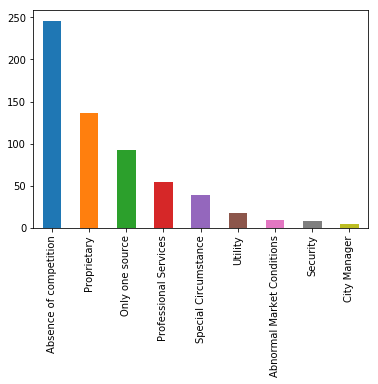

In [41]:
pd.value_counts(df1['ncr_name']).plot.bar()

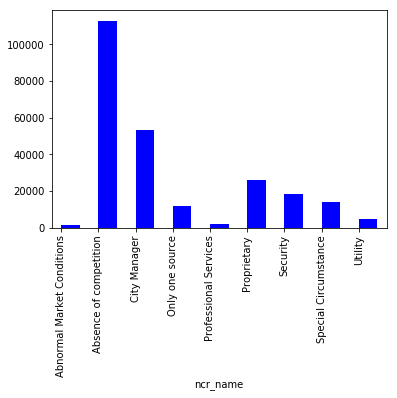

In [42]:
g1.Amount_rnd.plot(kind='bar', color='blue', position=0)

In [43]:
#and there you have it - absence of competition is a lot of non-contested contract values
#okay, what are the biggest size contracts so far?
df.sort_values('Amount', ascending=False)

,Item #,PO,Dept,Description,Professional / Consulting Services,Follow-on / Amendment,Amount,Vendor,Non-Competitive Rationale,Type,Year,Quarters,YrQtr,Amount_rnd,Dept_Old,noncomp
1541,350,45083182,PIED,Combined sewage storage tunnel construction.,NaN,NaN,1.613505e+08,DRAGADOS - TOMLINSON JOINT VENTURE\nTORONTO ON,NaN,FEDCO,2016,34,201634,161350.52835,"Planning, Infrastructure\n& Economic Development",1
4120,49,45081953,TO,To provide wheelchair accessible and non-accessible taxi services for Transit Services' Para Transpo.,NaN,NaN,4.997179e+07,PARA LOGISTICS LTD\nOTTAWA ON,Section 22(1)(d)\nAbsence of competition for technical or other reasons,TRANSIT,2016,12,201612,49971.78761,TO,0
4454,79,STANDING OFFER,TO,Standing Offer for the supply and delivery of genuine Cummins parts and components.,NaN,NaN,2.734941e+07,CITY VIEW BUS SALES & SERVICE LTD,NaN,TRANSIT,2017,34,201734,27349.41198,Transit Operations,1
3608,469,45085320,PIED,"To provide all labour, equipment and materials for Robert O Pickard Environmental Centre thickening and dewatering building upgrade.",NaN,NaN,1.943757e+07,PEAK ENGINEERING AND,NaN,FEDCO,2017,34,201734,19437.57446,"Planning, Infrastructure & Economic Development",1
4416,41,45084429,TO,Supply and deliver Bulk Clear Diesel Fuel ULSD# 2 to Transit Services for the period 01 May 2017 to 30 April 2020.,NaN,E,1.926069e+07,SUNCOR/PETRO CANADA,NaN,TRANSIT,2017,34,201734,19260.68583,Transit Operations,1
4089,18,45082561,CSP,"To supply, install, operate and maintain a fare control system to be implemented on both the Trillium Line and Confederation Line.",PE,NaN,1.775128e+07,SCHEIDT & BACHMANN GMBH\nMONCHENGLADBACH 5,NaN,TRANSIT,2016,12,201612,17751.28406,CSP,1
4210,40,45081434,TO,Supply and deliver seventeen (17) Additional High Capacity Transit Buses.,NaN,A3,1.740732e+07,ALEXANDER DENNIS (CANADA) INC OTTAWA ON,NaN,TRANSIT,2016,34,201634,17407.32000,Transit Operations,1
4212,42,45082070,TO,Supply and deliver Bulk Clear Diesel Fuel (ULSD #2) to Transit Services.,NaN,NaN,1.616116e+07,SUNCOR/PETRO CANADA MISSISSAUGA ON,NaN,TRANSIT,2016,34,201634,16161.15846,Transit Operations,1
1032,1033,45081456,IS,Kanata West Pump Station and Forcemains.,NaN,NaN,1.602864e+07,DORAN CONTRACTORS LIMITED\nOTTAWA ON,NaN,FEDCO,2016,12,201612,16028.64489,IS,1
2062,871,45082782,TSS,Preliminary engineering and project management services for the Stage 2 Ottawa Light Rail Transit Project.,PE,A,1.583859e+07,"CAPITAL TRANSIT PHASE 2, A JOINT MARKHAM ON",Section 22(1)(7)City Manager Approval,FEDCO,2016,34,201634,15838.58682,Transportation Services,0


In [44]:
def printdf(max):
    for i in range(0, max):
        print(df['Description'].iloc[i])
        
    return

printdf(20)

Professional audit services for the Light Rail Transit project.
Professional auditing services for the LRT Planning and Change Management Program.
To provide professional auditing services for the Byward and Parkdale Markets Audit.
To provide off-site records storage and records center services.
Supply of parking tickets for the handheld ticket issuing devices leased from Parksmart for April to June 2016.
Data Entry Processing of Tickets Certificates of Offence and Certificates of Parking Infraction for the City Clerk and Solicitor.
Print and deliver City of Ottawa snow and sweeping signs for Courthouse & Provincial Offence Services Branch, Print Shop.
Professional services to carry out transcription services for the City Clerk & Solicitor's office, on an as and when requested basis for 2016.
Temporary Placement of IT Professional Resource, to provide technical expertise in support of the BIMS Software Upgrade project.
Full service, maintenance and toner services for the performance pr